In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud

Cargo los dataframes

In [16]:
df_games = pd.read_parquet(r'C:\PROYECTO-INDIVIDUAL\Data\parquet\games.parquet')
df_items = pd.read_parquet(r'C:\PROYECTO-INDIVIDUAL\Data\parquet\items.parquet')

Consideramos que el mas importante es el EDA del df_games, ya que nos dara información sobre las ventas y las recaudaciones en base a factores influyentes.

EDA GAMES
==

In [3]:
# Crear un nuevo dataframe 'EDA_games' con las mismas columnas que 'items'
EDA_games = df_games.copy()
# Calcular la cantidad de ventas de cada item
ventas_por_item = df_items['item_id'].value_counts().reset_index()
ventas_por_item.columns = ['item_id', 'cantidad_ventas']
# Fusionar el dataframe 'ventas_por_item' con 'EDA_games' basado en 'item_id'
EDA_games = pd.merge(EDA_games, ventas_por_item, left_on='id', right_on='item_id', how='left')
# Calcular el total de ventas multiplicando la cantidad de ventas por el precio
EDA_games['recaudado_por_ventas'] = EDA_games['cantidad_ventas'] * EDA_games['price']
# Mostrar el nuevo dataframe 'EDA_games' con las columnas añadidas
EDA_games.head()

,genres,title,tags,price,id,developer,Accounting,Action,Adventure,Animation&amp,...,Strategy,Utilities,VideoProduction,WebPublishing,anio,mes,dia,item_id,cantidad_ventas,recaudado_por_ventas
0,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,"Strategy, Action, Indie, Casual, Simulation",4.99,761140,kotoshiro,0,1,0,0,...,1,0,0,0,2018,1,4,NaN,NaN,NaN
1,"FreetoPlay, Indie, RPG, Strategy",Ironbound,"FreetoPlay, Strategy, Indie, RPG, CardGame, Tr...",0.00,643980,secret level srl,0,0,0,0,...,1,0,0,0,2018,1,4,NaN,NaN,NaN
2,"Casual, FreetoPlay, Indie, Simulation, Sports",Real Pool 3D - Poolians,"FreetoPlay, Simulation, Sports, Casual, Indie,...",0.00,670290,poolians.com,0,0,0,0,...,0,0,0,0,2017,7,24,NaN,NaN,NaN
3,"Action, Adventure, Casual",u5f39u70b8u4eba2222,"Action, Adventure, Casual",0.99,767400,u5f7cu5cb8u9886u57df,0,1,1,0,...,0,0,0,0,2017,12,7,NaN,NaN,NaN
4,"Action, Adventure, Simulation",Battle Royale Trainer,"Action, Adventure, Simulation, FPS, Shooter, T...",3.99,772540,trickjump games ltd,0,1,1,0,...,0,0,0,0,2018,1,4,NaN,NaN,NaN


Ventas por genero

In [4]:

EDA_games_genres = EDA_games.copy()
# Primero, agrupa el dataframe 'nuevo_items' por género y suma las cantidades de ventas y las ventas totales
EDA_games_genres = EDA_games_genres.groupby('genres').agg({'cantidad_ventas': 'sum', 'recaudado_por_ventas': 'sum'}).reset_index()
# Mostrar el nuevo dataframe 'ventas_por_genero' con las sumas por género
EDA_games_genres.head()

,genres,cantidad_ventas,recaudado_por_ventas
0,Accounting,0.0,0.00
1,"Accounting, Animation&amp, Modeling, AudioProd...",0.0,0.00
2,"Accounting, Utilities",0.0,0.00
3,Action,501341.0,8434170.78
4,"Action, Adventure",198500.0,4222515.98


Generos con mas recaudacion


In [5]:
EDA_games_genres = EDA_games_genres.sort_values(by='recaudado_por_ventas', ascending=False)
EDA_games_genres.head()

,genres,cantidad_ventas,recaudado_por_ventas
3,Action,501341.0,8434170.78
4,"Action, Adventure",198500.0,4222515.98
859,Strategy,119338.0,2552019.76
363,"Action, RPG",109767.0,2132064.33
304,"Action, Indie",121813.0,1430130.98


Funcion para extrar los generos y ventas de la lista

In [6]:
generos_dict = {}
# Función para separar los géneros y agregarlos al diccionario si no están agregados anteriormente
def agregar_generos(cantidad_ventas, generos_str):
    # Remover los corchetes y comillas
    generos_str = generos_str.strip("[]").replace("'", "")
    # Separar los géneros por coma
    generos = generos_str.split(", ")
    # Agregar los géneros al diccionario junto con la cantidad de ventas si no están ya presentes
    for genero in generos:
        if genero not in generos_dict:
            generos_dict[genero] = cantidad_ventas
        else:
            generos_dict[genero] += cantidad_ventas
# Aplicar la función a la columna 'genres'
EDA_games_genres.apply(lambda row: agregar_generos(row['cantidad_ventas'], row['genres']), axis=1)
# Mostrar el diccionario resultante
print(generos_dict)

{'Action': 1902419.0, 'Adventure': 789664.0, 'Strategy': 514584.0, 'RPG': 625013.0, 'Indie': 1249683.0, 'Simulation': 406330.0, 'MassivelyMultiplayer': 252732.0, 'EarlyAccess': 96554.0, 'Casual': 328187.0, 'FreetoPlay': 520950.0, 'Racing': 65324.0, 'Sports': 77737.0, 'Design&amp': 5256.0, 'Illustration': 5256.0, 'WebPublishing': 2548.0, 'None': 2797.0, 'Animation&amp': 4374.0, 'Modeling': 4374.0, 'VideoProduction': 3291.0, 'Utilities': 5398.0, 'Education': 1335.0, 'SoftwareTraining': 884.0, 'AudioProduction': 503.0, 'PhotoEditing': 331.0, 'Accounting': 0.0}


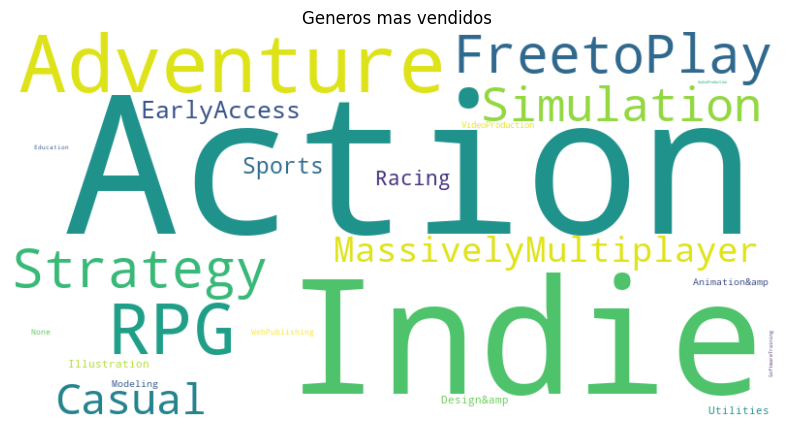

In [7]:
df_generos = pd.DataFrame(list(generos_dict.items()), columns=['Genero', 'Cantidad_ventas'])
genero_cantidad_ventas = dict(zip(df_generos['Genero'], df_generos['Cantidad_ventas']))
# Crear la wordcloud con los datos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genero_cantidad_ventas)

# Mostrar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Generos mas vendidos')
plt.show()

Relacion entre la recaudacion por ventas y el año

In [9]:
EDA_games_year = EDA_games.copy()
# Primero, agrupa el dataframe 'nuevo_items' por year y suma las cantidades de ventas y las ventas totales
EDA_games_year = EDA_games_year.groupby('anio').agg({'cantidad_ventas': 'sum', 'recaudado_por_ventas': 'sum'}).reset_index()
# Eliminacion de los None
EDA_games_year = EDA_games_year[EDA_games_year['cantidad_ventas'] != 0.0]

EDA_games_year.head()

,anio,cantidad_ventas,recaudado_por_ventas
0,1983,72.0,719.28
1,1984,13.0,129.87
4,1987,36.0,311.64
5,1988,287.0,1720.13
6,1989,82.0,520.18


#### Recaudado por año

<BarContainer object of 34 artists>

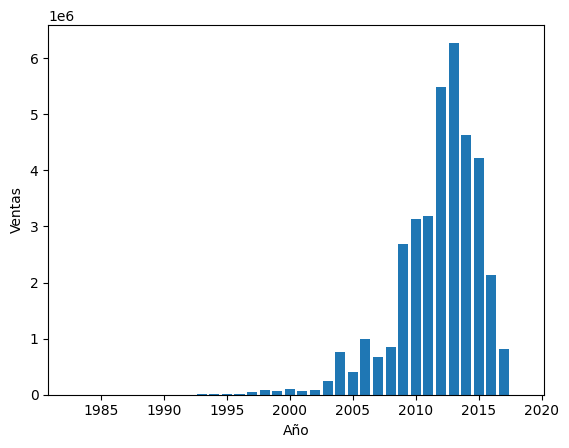

In [10]:
x = EDA_games_year['anio'].values
height = EDA_games_year['recaudado_por_ventas'].values

fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='Año', ylabel='Ventas')
plt.bar(x, height, width=0.8, bottom=None,  align='center', data=None)

### Mejores desarrolladoras

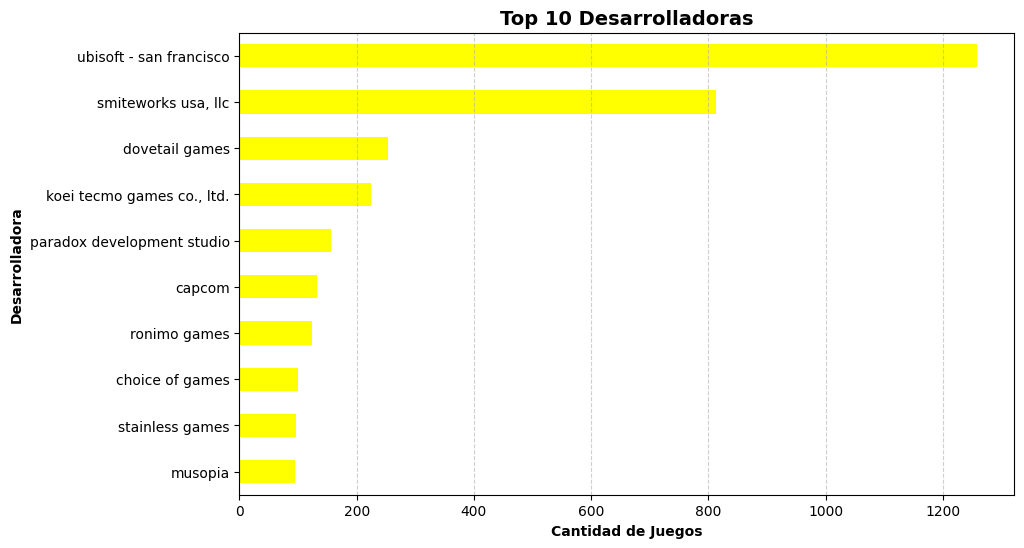

In [11]:
# Contamos la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Creamos una figura solo con un subplot para los developers
plt.figure(figsize=(10, 6))

# Plot para los developers
conteo_developer[:10].sort_values().plot(kind='barh', color='yellow')  # Usar plot horizontal para facilitar la lectura
plt.title('Top 10 Desarrolladoras', fontsize=14, weight='bold')
plt.xlabel('Cantidad de Juegos', weight='bold')
plt.ylabel('Desarrolladora', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Agregar líneas de cuadrícula para referencia

# Mostramos el gráfico
plt.show()

### Distribución de Precios

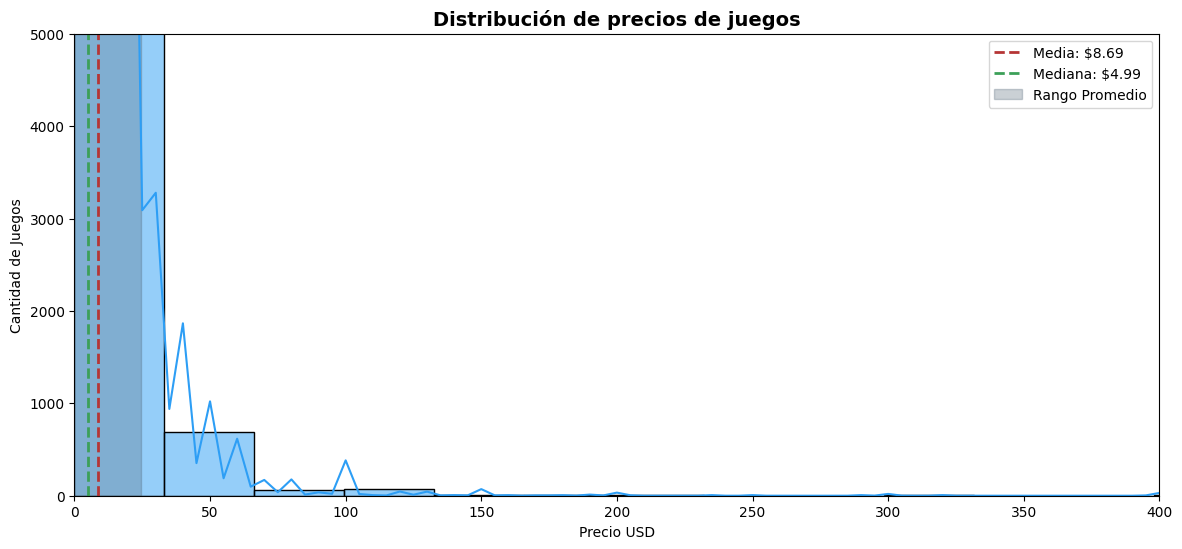

In [12]:
# Obtenemos los precios para cada juego y hacer un DataFrame
precio_unicos = df_games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

# Calculamos media y mediana
media = df_precio_unicos.mean()
mediana = df_precio_unicos.median()

# Calculamos porcentajes dentro y fuera del rango promedio
porcentaje_dentro = (df_precio_unicos.between(media - df_precio_unicos.std(), media + df_precio_unicos.std())).sum() / len(df_precio_unicos) * 100
porcentaje_fuera = 100 - porcentaje_dentro

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Usamos un histograma para visualizar la distribución de precios
sns.histplot(df_precio_unicos, bins=30, color='#2D9EF5', kde=True)

# Agregamos líneas indicadoras para la media y la mediana
ax.axvline(media, color='#B53535', linestyle='dashed', linewidth=2, label=f'Media: ${media:.2f}')
ax.axvline(mediana, color='#3CA058', linestyle='dashed', linewidth=2, label=f'Mediana: ${mediana:.2f}')

# Agregamos áreas sombreadas para indicar el rango promedio
ax.axvspan(media - df_precio_unicos.std(), media + df_precio_unicos.std(), alpha=0.3, color='#506575', label='Rango Promedio')

# Personalizamos el gráfico
ax.set_xlabel('Precio USD')
ax.set_ylabel('Cantidad de Juegos')
ax.set_title('Distribución de precios de juegos', fontsize=14, weight='bold')
ax.legend()  # Mostrar leyenda

# Ajustamos el rango del eje y para enfocarse mejor en la distribución principal
ax.set_ylim(0, 5000)
ax.set_xlim(0,400)

# Mostramos el gráfico
plt.show()

### Juegos mas jugados

C:\Users\augus\AppData\Local\Temp\ipykernel_13344\3803996963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='playtime_forever', y='title', data=merged_data.groupby('title')['playtime_forever'].sum().sort_values(ascending=False).head(10).reset_index(), palette='rocket')


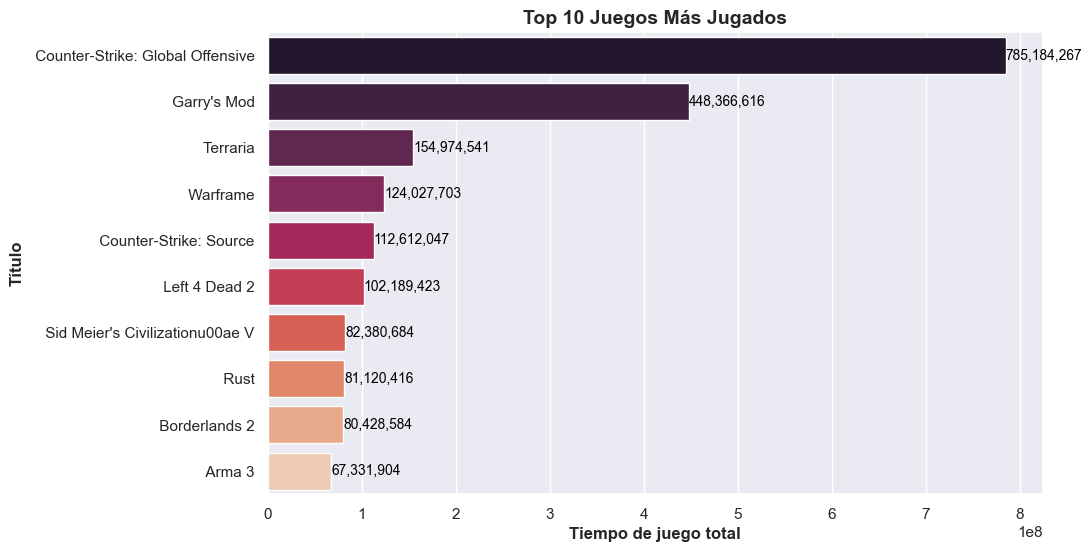

In [13]:
# Join the tables on 'item_id' and 'item_id'
merged_data = pd.merge(df_games, df_items, left_on='id', right_on='item_id', how='inner')

# Configurar el estilo de seaborn
sns.set(style='darkgrid')

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='playtime_forever', y='title', data=merged_data.groupby('title')['playtime_forever'].sum().sort_values(ascending=False).head(10).reset_index(), palette='rocket')

# Añadir etiquetas de datos a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

# Personalizar el gráfico
ax.set_xlabel('Tiempo de juego total', weight='bold')
ax.set_ylabel('Título', weight='bold')
ax.set_title('Top 10 Juegos Más Jugados', fontsize=14, weight='bold')

# Mostrar el gráfico
plt.show()